In [0]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [0]:
#import os
#os.environ['KAGGLE_USERNAME'] = "$USER_NAME" 
#os.environ['KAGGLE_KEY'] = "$KEY" 
#!kaggle competitions download -c ieee-fraud-detection # api copied from kaggle

In [0]:
#from zipfile import ZipFile

#zf = ZipFile('train_transaction.csv.zip', 'r')
#zf.extractall()
#zf.close()

#zf = ZipFile('train_identity.csv.zip', 'r')
#zf.extractall()
#zf.close()

#zf = ZipFile('test_transaction.csv.zip', 'r')
#zf.extractall()
#zf.close()

#zf = ZipFile('test_identity.csv.zip', 'r')
#zf.extractall()
#zf.close()

In [0]:
df_trans = pd.read_csv('train_transaction.csv')
df_identity = pd.read_csv('train_identity.csv')

In [5]:
print(df_trans.shape)
print(df_trans['TransactionID'].nunique())

(590540, 394)
590540


In [6]:
df_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(df_identity.shape)
print(df_identity['TransactionID'].nunique())

(144233, 41)
144233


In [8]:
df_train = pd.merge(df_trans, df_identity, on = 'TransactionID', how = 'left')
df_train.shape

(590540, 434)

In [9]:
print(df_train['isFraud'].value_counts())
print('\n')
fraud_pct = (len(df_train[df_train['isFraud'] == 1]) / len(df_train)) * 100
print('Fraud = ', fraud_pct, '%')

0    569877
1     20663
Name: isFraud, dtype: int64


Fraud =  3.4990009144173126 %


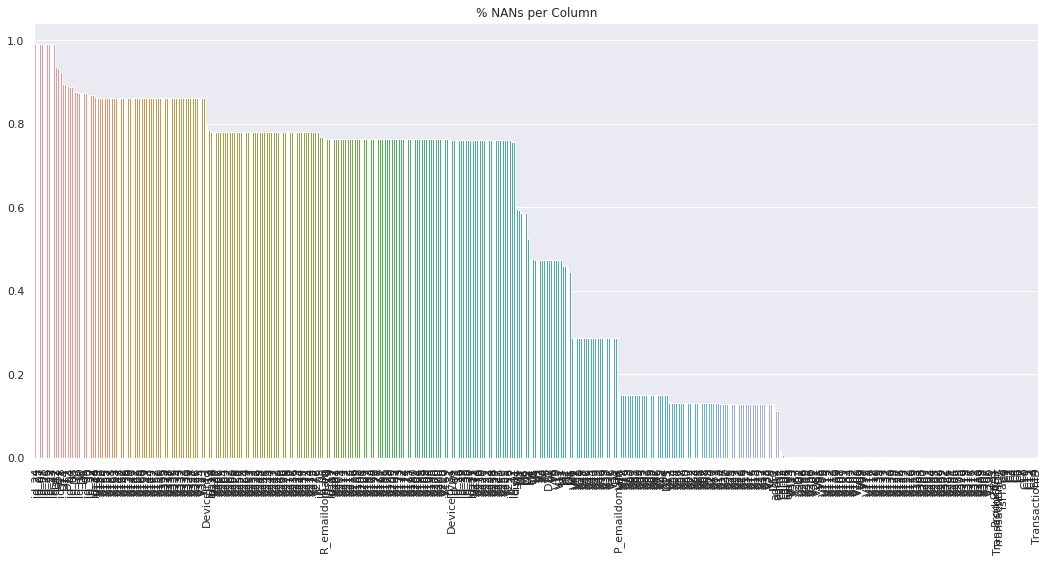

In [10]:
def visualize(X, Y):
  sns.set(style="darkgrid", palette="bright")
  plt.figure(figsize=(18,8))
  sns.barplot(x = X, 
              y = Y,
              )
  plt.title('% NANs per Column')
  plt.xticks(rotation = 90)

#Visualizing NANs % per Column
X = df_train.isnull().sum().sort_values(ascending = False).index
Y = df_train.isnull().sum().sort_values(ascending = False)/len(df_train)
visualize(X, Y)

In [11]:
df_cols_nans_count = df_train.isnull().sum().sort_values(ascending = False)
df_cols_nans_per = df_cols_nans_count/len(df_train)
df_cols_nans = pd.DataFrame({"nans_count" : df_cols_nans_count, "nans_%" : df_cols_nans_per})
df_cols_nans[:10]

,nans_count,nans_%
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
id_26,585377,0.991257
id_22,585371,0.991247
id_23,585371,0.991247
id_27,585371,0.991247
dist2,552913,0.936284


In [12]:
cols_drop_range = np.array([0.05, 0.10, 0.15, 0.20, 0.35, 0.45, 0.50, 0.70])
for col in range(len(cols_drop_range)):
  remaining_cols = df_cols_nans[df_cols_nans['nans_%'] <= cols_drop_range[col]]
  print('For using ', cols_drop_range[col], 'as a limiter we are left with ',remaining_cols.shape[0]/df_train.shape[1],'% of columns.')

For using  0.05 as a limiter we are left with  0.25806451612903225 % of columns.
For using  0.1 as a limiter we are left with  0.25806451612903225 % of columns.
For using  0.15 as a limiter we are left with  0.3686635944700461 % of columns.
For using  0.2 as a limiter we are left with  0.41935483870967744 % of columns.
For using  0.35 as a limiter we are left with  0.46543778801843316 % of columns.
For using  0.45 as a limiter we are left with  0.46774193548387094 % of columns.
For using  0.5 as a limiter we are left with  0.5069124423963134 % of columns.
For using  0.7 as a limiter we are left with  0.5207373271889401 % of columns.


In [13]:
limiter = 0.35
discarded_cols = df_cols_nans[df_cols_nans['nans_%'] > limiter].index
df_train = df_train.drop(columns = discarded_cols)
df_train.shape

(590540, 202)

In [0]:
def encoding_categoricals(df):
  categorical_features = df.select_dtypes(include=[object])
  encoded_categorical_features = pd.get_dummies(categorical_features)
  df = df.drop(columns = categorical_features)
  df = pd.concat([df, encoded_categorical_features], axis = 1)
  return df

In [0]:
def fill_nans(df):
  df = df.fillna(df.mode())
  df = df.dropna()
  return df

In [16]:
df_train = encoding_categoricals(df_train)
df_train = fill_nans(df_train)
df_train.shape

(346913, 271)

In [17]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,...,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com,M6_F,M6_T
0,2987000,0,86400,68.5,13926,321.0,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,94.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,2987005,0,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
X_train = df_train[df_train.columns.difference(['Transaction_ID','isFraud'])]
y_train = df_train['isFraud']

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

In [0]:
#sklearn.model_selection.train_test_split

In [21]:
print('X train : ', X_train.shape, ' Y train : ', y_train.shape)

X train :  (346913, 270)  Y train :  (346913,)


In [0]:
from sklearn.linear_model import LogisticRegression # deep learning or a boosting model would perform better on this task

In [23]:
regressor = LogisticRegression(solver = 'lbfgs')
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))
y_train_pred = regressor.predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9804475473677838


In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train[:np.shape(X_train)[0]], cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s remaining:    0.0s


[CV] .................................... , score=0.978, total=  16.9s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.9s remaining:    0.0s


[CV] .................................... , score=0.980, total=  16.0s
[CV]  ................................................................
[CV] .................................... , score=0.979, total=  16.5s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.4s finished


0.9790177940697347